C:\Users\Admin\AppData\Local\Temp/ipykernel_10208/2946476497.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_pivot = df_pivot.apply(pd.to_numeric, errors='ignore')


Metric  Current Ratio  Debt-to-Asset Ratio  Debt-to-Equity Ratio  \
Năm                                                                
2022              1.2                 64.0                  1.78   
2023              1.1                 66.0                  1.94   
2024              1.3                 60.0                  1.50   

Metric  Gross Profit Margin  Inventory Turnover  Net Profit After Tax (NPAT)  \
Năm                                                                            
2022                   23.3                 4.5                       4100.0   
2023                   19.1                 4.0                        168.0   
2024                   20.5                 4.2                       2200.0   

Metric  Net Profit Margin  Net Revenue  Quick Ratio  Return on Assets (ROA)  \
Năm                                                                           
2022                 3.10     133340.0          0.6                    12.5   
2023                 

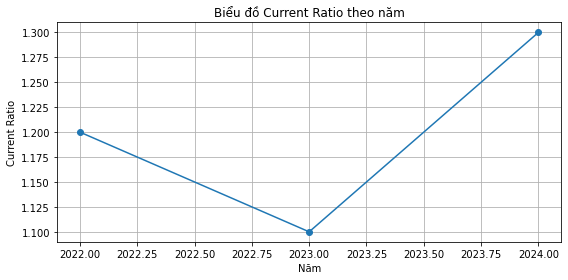

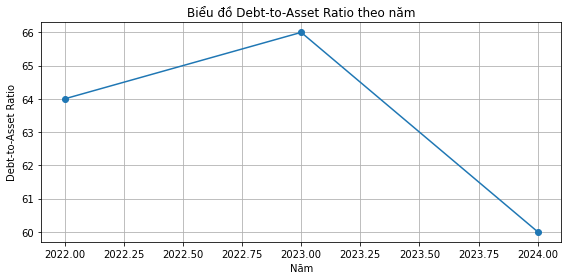

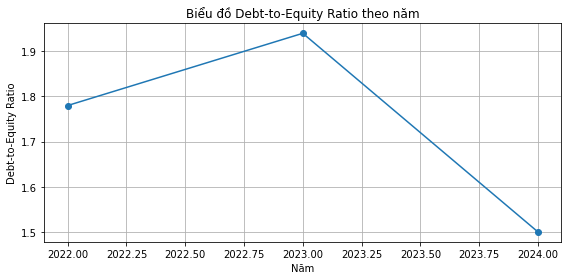

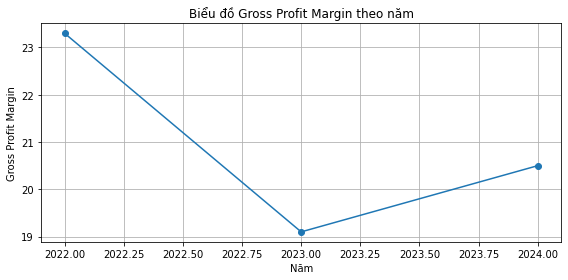

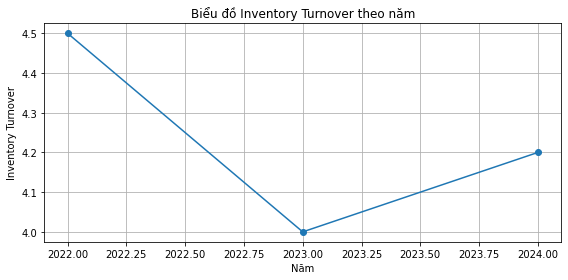

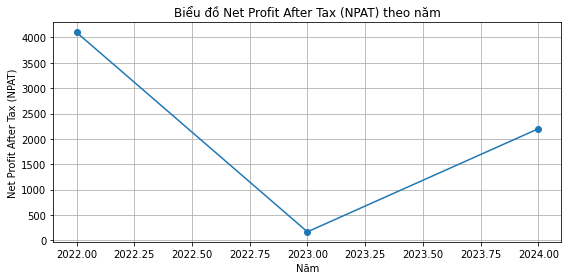

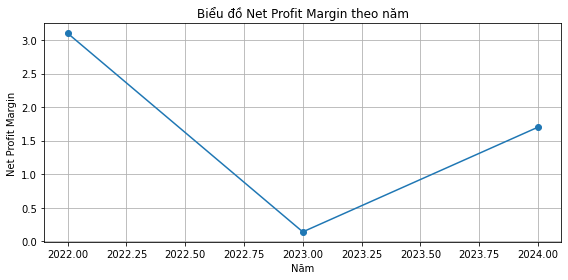

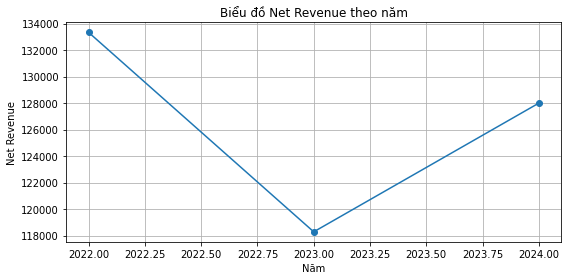

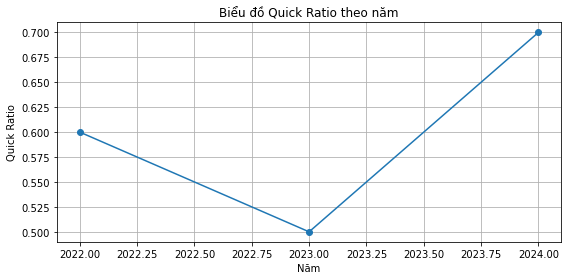

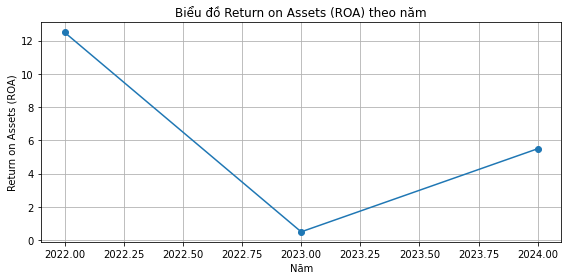

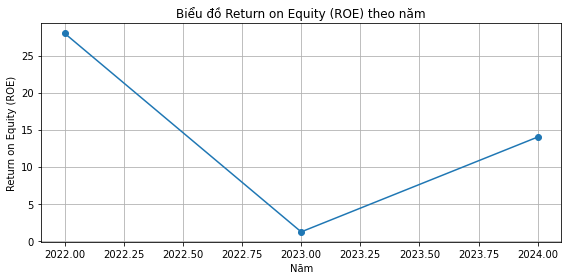

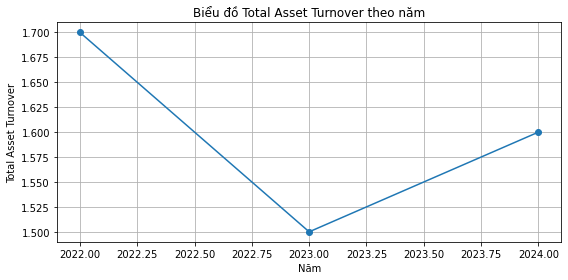

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu, bỏ qua các dòng tiêu đề nhóm (bắt đầu bằng "---")
df = pd.read_csv("Finance_MWG.csv")
df = df[~df['Metric'].str.startswith('---')]

# Chuyển dữ liệu về dạng phân tích theo năm (mỗi năm một dòng)
df_melt = df.melt(id_vars=['Metric', 'Unit'], var_name='Năm', value_name='Giá trị')
df_pivot = df_melt.pivot_table(index='Năm', columns='Metric', values='Giá trị')

# Đổi kiểu dữ liệu về số nếu có thể
df_pivot = df_pivot.apply(pd.to_numeric, errors='ignore')
df_pivot.index = pd.to_numeric(df_pivot.index)

# Hiển thị dữ liệu đã xử lý
print(df_pivot)

# Vẽ biểu đồ cho từng chỉ số
for col in df_pivot.columns:
    plt.figure(figsize=(8,4))
    plt.plot(df_pivot.index, df_pivot[col], marker='o')
    plt.title(f'Biểu đồ {col} theo năm')
    plt.xlabel('Năm')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

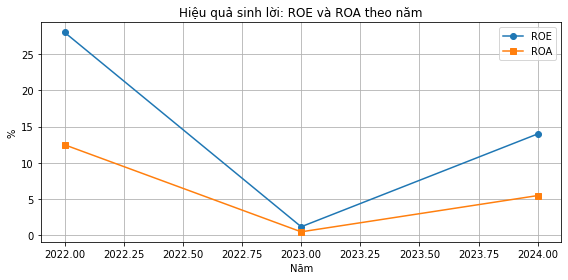

In [8]:
# ...existing code...

# Phân tích ROE và ROA
roe = df_pivot['Return on Equity (ROE)']
roa = df_pivot['Return on Assets (ROA)']

plt.figure(figsize=(8,4))
plt.plot(df_pivot.index, roe, marker='o', label='ROE')
plt.plot(df_pivot.index, roa, marker='s', label='ROA')
plt.title('Hiệu quả sinh lời: ROE và ROA theo năm')
plt.xlabel('Năm')
plt.ylabel('%')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# ...existing code...

In [10]:
# ...existing code...

# Ví dụ: Tính tỷ lệ dòng tiền trên vốn chủ sở hữu (nếu có dữ liệu)
if 'Operating Cash Flow' in df_pivot.columns and 'Equity' in df_pivot.columns:
    df_pivot['OCF/Equity'] = df_pivot['Operating Cash Flow'] / df_pivot['Equity']
    plt.figure(figsize=(8,4))
    plt.plot(df_pivot.index, df_pivot['OCF/Equity'], marker='o')
    plt.title('Tỷ lệ dòng tiền hoạt động trên Vốn chủ sở hữu')
    plt.xlabel('Năm')
    plt.ylabel('OCF/Equity')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
# ...existing code...

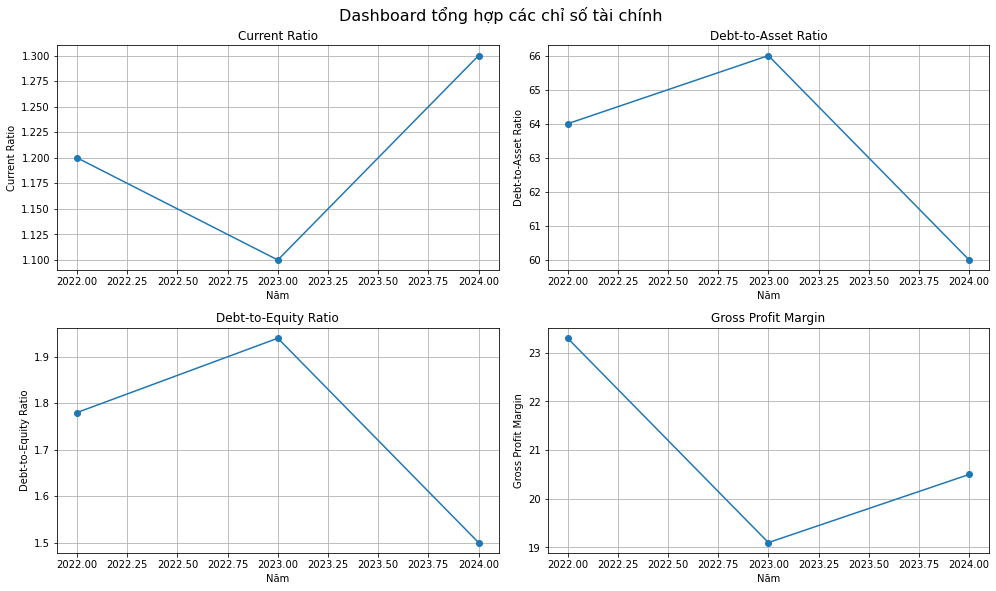

In [11]:
# ...existing code...

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
cols = df_pivot.columns[:4]  # Lấy 4 chỉ số đầu tiên làm ví dụ

for ax, col in zip(axs.flat, cols):
    ax.plot(df_pivot.index, df_pivot[col], marker='o')
    ax.set_title(col)
    ax.set_xlabel('Năm')
    ax.set_ylabel(col)
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Dashboard tổng hợp các chỉ số tài chính', y=1.02, fontsize=16)
plt.show()
# ...existing code...

In [12]:
# ...existing code...

# Chuyển dữ liệu về dạng phân tích theo năm (mỗi năm một dòng, mỗi chỉ số là một cột)
df_melt = df.melt(id_vars=['Metric', 'Unit'], var_name='Năm', value_name='Giá trị')
df_pivot = df_melt.pivot_table(index='Năm', columns='Metric', values='Giá trị')

# Đổi kiểu dữ liệu về số nếu có thể
df_pivot = df_pivot.apply(pd.to_numeric, errors='ignore')
df_pivot.index = pd.to_numeric(df_pivot.index)

# Xuất ra file CSV dạng cột
df_pivot.to_csv("Finance_MWG_by_year.csv")
print(df_pivot)
# ...existing code...

Metric  Current Ratio  Debt-to-Asset Ratio  Debt-to-Equity Ratio  \
Năm                                                                
2022              1.2                 64.0                  1.78   
2023              1.1                 66.0                  1.94   
2024              1.3                 60.0                  1.50   

Metric  Gross Profit Margin  Inventory Turnover  Net Profit After Tax (NPAT)  \
Năm                                                                            
2022                   23.3                 4.5                       4100.0   
2023                   19.1                 4.0                        168.0   
2024                   20.5                 4.2                       2200.0   

Metric  Net Profit Margin  Net Revenue  Quick Ratio  Return on Assets (ROA)  \
Năm                                                                           
2022                 3.10     133340.0          0.6                    12.5   
2023                 

C:\Users\Admin\AppData\Local\Temp/ipykernel_10208/61220738.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_pivot = df_pivot.apply(pd.to_numeric, errors='ignore')


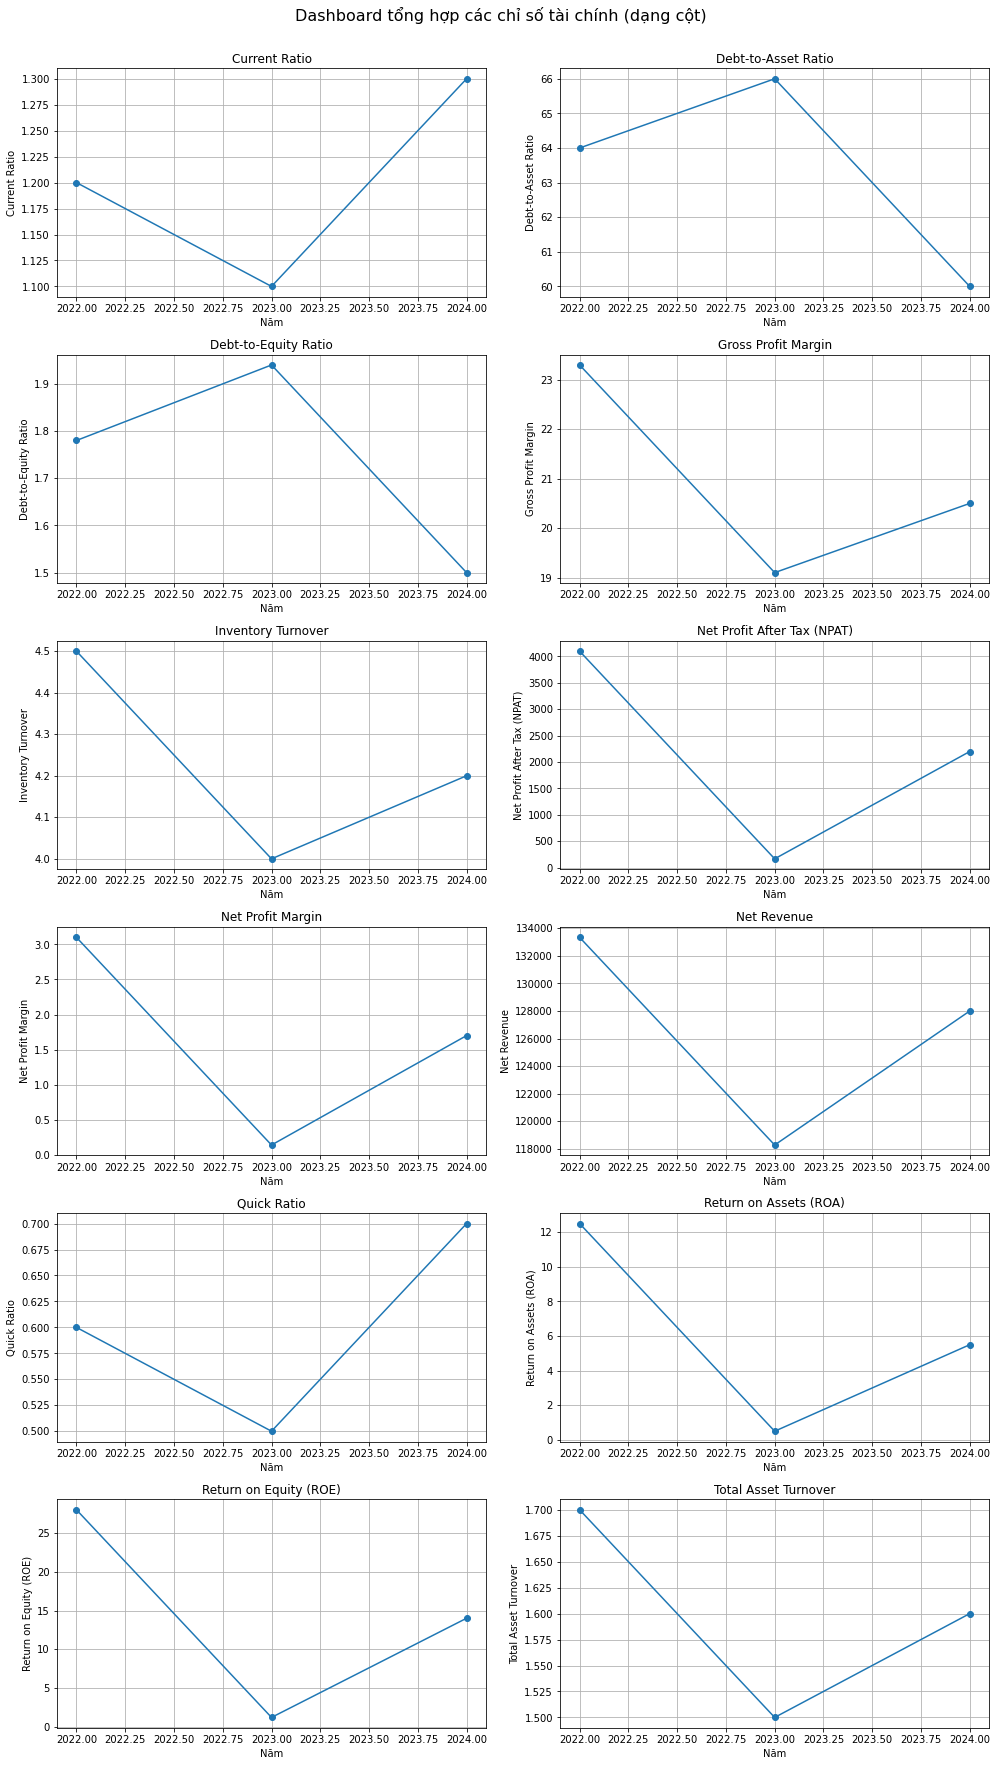

In [13]:
# ...existing code...

# Dashboard tổng hợp: Vẽ tất cả chỉ số trên từng subplot, mỗi chỉ số là một cột
import math

num_metrics = len(df_pivot.columns)
ncols = 2  # Số cột subplot
nrows = math.ceil(num_metrics / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(7*ncols, 4*nrows))
axs = axs.flatten()

for i, col in enumerate(df_pivot.columns):
    axs[i].plot(df_pivot.index, df_pivot[col], marker='o')
    axs[i].set_title(col)
    axs[i].set_xlabel('Năm')
    axs[i].set_ylabel(col)
    axs[i].grid(True)

# Ẩn các subplot thừa nếu có
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Dashboard tổng hợp các chỉ số tài chính (dạng cột)', y=1.02, fontsize=16)
plt.show()
# ...existing code...

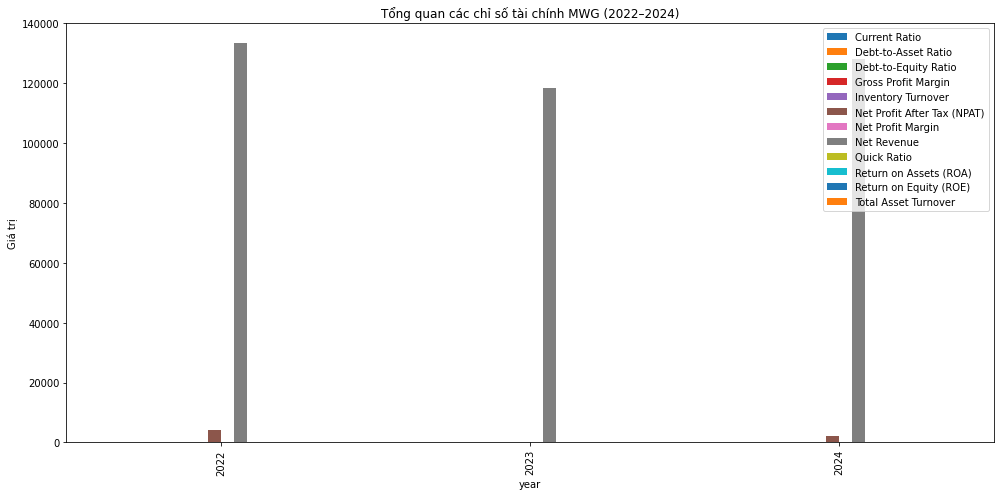

In [14]:
# ...existing code...

# Dashboard tổng hợp: Vẽ tất cả chỉ số trên cùng 1 biểu đồ cột nhóm
import matplotlib.pyplot as plt

df_plot = df_pivot.copy()
df_plot.index = df_plot.index.astype(str)  # Đảm bảo index là chuỗi để vẽ bar chart

ax = df_plot.plot(kind='bar', figsize=(14, 7))
plt.title('Tổng quan các chỉ số tài chính MWG (2022–2024)')
plt.xlabel('year')
plt.ylabel('Giá trị')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# ...existing code...

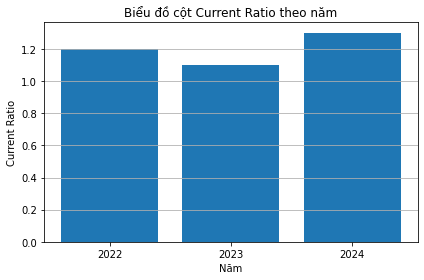

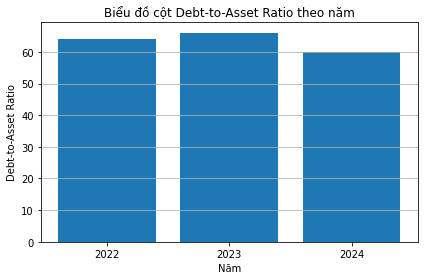

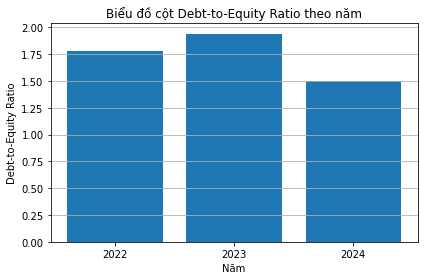

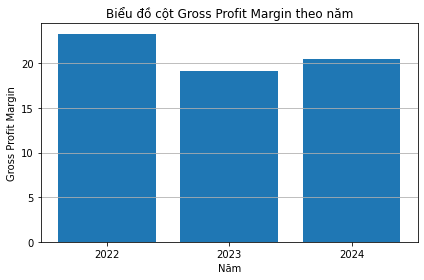

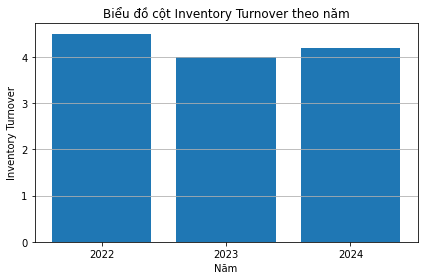

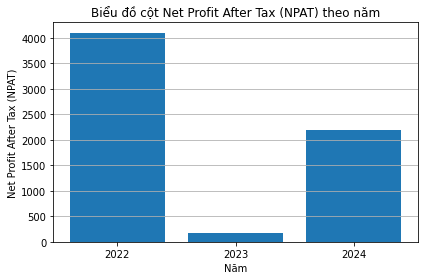

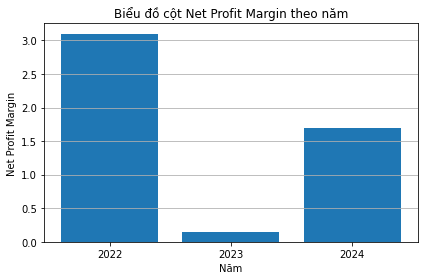

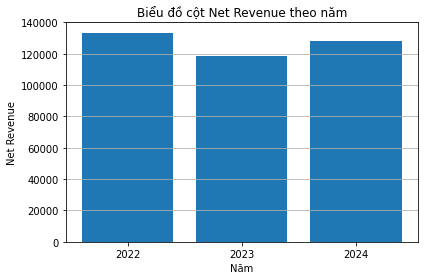

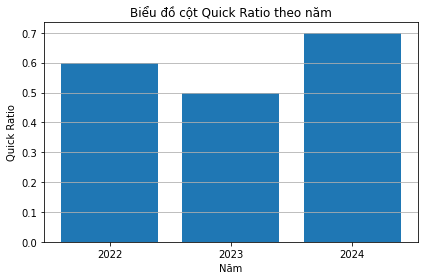

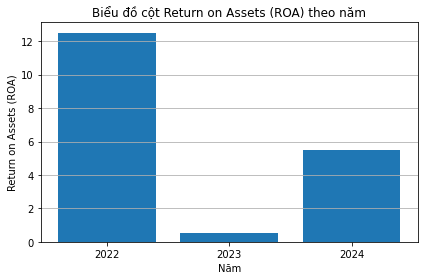

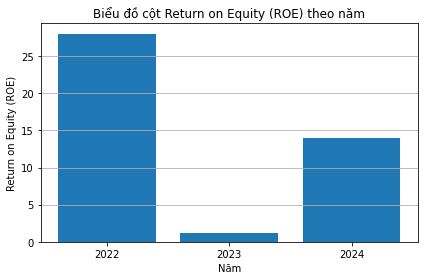

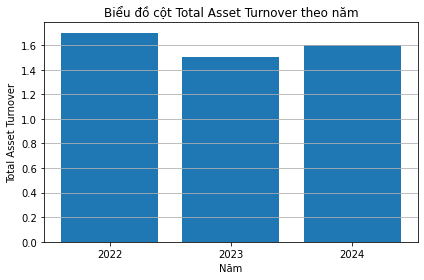

In [15]:
# ...existing code...

# Dashboard: Mỗi chỉ số một biểu đồ cột riêng
for col in df_pivot.columns:
    plt.figure(figsize=(6,4))
    plt.bar(df_pivot.index.astype(str), df_pivot[col])
    plt.title(f'Biểu đồ cột {col} theo năm')
    plt.xlabel('Năm')
    plt.ylabel(col)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
# ...existing code...

Năm
2022    1
2023    1
2024    6
Name: Piotroski F-score, dtype: int64


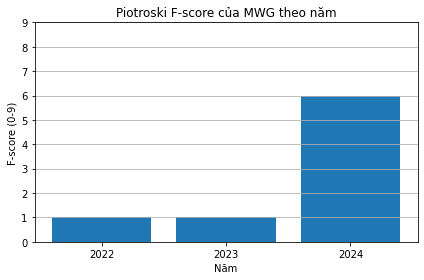

In [16]:
# ...existing code...

# Tính F-score của Piotroski cho từng năm
fscore = pd.Series(0, index=df_pivot.index)

# 1. ROA > 0 (Lợi nhuận trên tài sản dương)
fscore += (df_pivot['Return on Assets (ROA)'] > 0).astype(int)

# 2. ROA năm nay > ROA năm trước (Lợi nhuận cải thiện)
fscore += (df_pivot['Return on Assets (ROA)'].diff() > 0).astype(int)

# 3. Dòng tiền hoạt động > 0 (giả sử có cột Operating Cash Flow)
if 'Operating Cash Flow' in df_pivot.columns:
    fscore += (df_pivot['Operating Cash Flow'] > 0).astype(int)

# 4. Dòng tiền hoạt động > Lợi nhuận sau thuế (chất lượng lợi nhuận)
if 'Operating Cash Flow' in df_pivot.columns and 'Net Profit After Tax (NPAT)' in df_pivot.columns:
    fscore += (df_pivot['Operating Cash Flow'] > df_pivot['Net Profit After Tax (NPAT)']).astype(int)

# 5. Tỷ lệ nợ/tài sản giảm (Debt-to-Asset Ratio giảm)
if 'Debt-to-Asset Ratio' in df_pivot.columns:
    fscore += (df_pivot['Debt-to-Asset Ratio'].diff() < 0).astype(int)

# 6. Current Ratio tăng (thanh khoản tăng)
if 'Current Ratio' in df_pivot.columns:
    fscore += (df_pivot['Current Ratio'].diff() > 0).astype(int)

# 7. Không phát hành thêm cổ phiếu (không có dữ liệu, bỏ qua hoặc mặc định 1)
# fscore += 1

# 8. Biên lợi nhuận gộp tăng (Gross Profit Margin tăng)
if 'Gross Profit Margin' in df_pivot.columns:
    fscore += (df_pivot['Gross Profit Margin'].diff() > 0).astype(int)

# 9. Vòng quay tài sản tăng (Total Asset Turnover tăng)
if 'Total Asset Turnover' in df_pivot.columns:
    fscore += (df_pivot['Total Asset Turnover'].diff() > 0).astype(int)

# Hiển thị F-score từng năm
fscore.name = 'Piotroski F-score'
print(fscore)

# Vẽ biểu đồ F-score
plt.figure(figsize=(6,4))
plt.bar(fscore.index.astype(str), fscore)
plt.title('Piotroski F-score của MWG theo năm')
plt.xlabel('Năm')
plt.ylabel('F-score (0-9)')
plt.ylim(0, 9)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# ...existing code...

In [17]:
# ...existing code...

# Tính Altman Z-score (nếu có đủ dữ liệu)
if all(col in df_pivot.columns for col in [
    'Working Capital', 'Retained Earnings', 'EBIT', 'Market Value of Equity',
    'Total Assets', 'Total Liabilities', 'Net Revenue'
]):
    X1 = df_pivot['Working Capital'] / df_pivot['Total Assets']
    X2 = df_pivot['Retained Earnings'] / df_pivot['Total Assets']
    X3 = df_pivot['EBIT'] / df_pivot['Total Assets']
    X4 = df_pivot['Market Value of Equity'] / df_pivot['Total Liabilities']
    X5 = df_pivot['Net Revenue'] / df_pivot['Total Assets']
    df_pivot['Altman Z-score'] = 1.2*X1 + 1.4*X2 + 3.3*X3 + 0.6*X4 + 1.0*X5

    # Vẽ biểu đồ Altman Z-score
    plt.figure(figsize=(6,4))
    plt.bar(df_pivot.index.astype(str), df_pivot['Altman Z-score'])
    plt.title('Altman Z-score của MWG theo năm')
    plt.xlabel('Năm')
    plt.ylabel('Z-score')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("Không đủ dữ liệu để tính Altman Z-score.")
# ...existing code...

Không đủ dữ liệu để tính Altman Z-score.


In [18]:
# ...existing code...

# Đánh giá sức khỏe tài chính tổng hợp cho MWG

def ket_luan_fscore(fscore):
    if fscore.mean() >= 7:
        return "F-score của Piotroski cho thấy doanh nghiệp có chất lượng tài chính rất tốt, ít rủi ro."
    elif fscore.mean() >= 5:
        return "F-score của Piotroski ở mức trung bình, doanh nghiệp cần theo dõi thêm các chỉ số tài chính."
    else:
        return "F-score của Piotroski thấp, doanh nghiệp tiềm ẩn rủi ro tài chính, cần chú ý."

def ket_luan_zscore(zscore):
    if (zscore > 2.99).all():
        return "Altman Z-score cho thấy doanh nghiệp an toàn, ít nguy cơ phá sản."
    elif (zscore < 1.81).any():
        return "Altman Z-score cảnh báo doanh nghiệp có nguy cơ phá sản cao ở một số năm."
    else:
        return "Altman Z-score ở vùng cảnh báo, doanh nghiệp cần chú ý cấu trúc tài chính."

def ket_luan_chiso(df):
    roe = df['Return on Equity (ROE)'].mean()
    roa = df['Return on Assets (ROA)'].mean()
    debt = df['Debt-to-Asset Ratio'].mean() if 'Debt-to-Asset Ratio' in df.columns else None
    cr = df['Current Ratio'].mean() if 'Current Ratio' in df.columns else None
    msg = []
    if roe > 15:
        msg.append("ROE trung bình cao, hiệu quả sử dụng vốn tốt.")
    else:
        msg.append("ROE trung bình thấp, hiệu quả sử dụng vốn chưa tốt.")
    if roa > 7:
        msg.append("ROA trung bình cao, hiệu quả sử dụng tài sản tốt.")
    else:
        msg.append("ROA trung bình thấp, hiệu quả sử dụng tài sản chưa tốt.")
    if debt is not None:
        if debt < 70:
            msg.append("Tỷ lệ nợ/tài sản ở mức an toàn.")
        else:
            msg.append("Tỷ lệ nợ/tài sản cao, rủi ro tài chính.")
    if cr is not None:
        if cr > 1:
            msg.append("Khả năng thanh khoản tốt.")
        else:
            msg.append("Khả năng thanh khoản yếu.")
    return " ".join(msg)

# Kết luận tổng hợp
print("=== ĐÁNH GIÁ SỨC KHỎE TÀI CHÍNH MWG ===")
if 'Piotroski F-score' in locals() or 'fscore' in locals():
    print(ket_luan_fscore(fscore))
if 'Altman Z-score' in df_pivot.columns:
    print(ket_luan_zscore(df_pivot['Altman Z-score']))
print(ket_luan_chiso(df_pivot))
# ...existing code...

=== ĐÁNH GIÁ SỨC KHỎE TÀI CHÍNH MWG ===
F-score của Piotroski thấp, doanh nghiệp tiềm ẩn rủi ro tài chính, cần chú ý.
ROE trung bình thấp, hiệu quả sử dụng vốn chưa tốt. ROA trung bình thấp, hiệu quả sử dụng tài sản chưa tốt. Tỷ lệ nợ/tài sản ở mức an toàn. Khả năng thanh khoản tốt.
